Title: "Elementary and high school students performance and relation to the district education finance " -GA Final Project Research proposal
Author: Yu Zhang
output: 

1. Introduction

In the discussion of K-12 students' success, the issue of financing is prominent from the perspective of various stakeholders. Policymakers are engaged in asking how much public purse should be devoted to elementary and high school students related to competing demands on tuition, expenditure, and transportation. Federal education and census are concerned about the financial capacity to provide quality education and sustain the living hood. Besides, the family and students concerned about how they pay for education can guarantee the students' success beyond elementary and high school. 

In observing the NAEP (National Assessment of Educational Progress) data and Educational financing data from the National Finance Census (National Center for Educational Statistics), we have been known the educational finance can be characterized by the goals of students' academic success, and by a strong influence by the financial capacity, by and large, we might predict the elementary and high school students academic success on mathematics and literacy to be influenced by the features of family and federal educational financing, this is for example, highly praise by educational scholar and researcher Joan Herman'description: "the keys resources, educational financing have been imposed the role to expand the enrollment and institutes. On the performance standards, the evaluation can be introduced to predict the student's performance"(2011). 


In [5]:
##chose the cut point for decision tree
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
path = './data/edu_data.csv'
edu = pd.read_csv(path)

In [7]:
edu['predition'] = edu.enrollment.mean()
edu

,Unnamed: 0,year,state,enrollment,total_revenue,federal_revenue,state_revenue,local_revenue,expenditure,current_spending_instruction,current_spending,other_spending,total_capital,score,test_subject,grade,predition
0,3,1996,District of Columbia,79802.000000,6.788740e+05,57870.000000,0.000000e+00,621004.000000,7.032450e+05,334893.000000,312944.000000,39956.000000,15452.000000,187.134670,Mathematics,4,72059.73749
1,4,1996,District of Columbia,79802.000000,6.788740e+05,57870.000000,0.000000e+00,621004.000000,7.032450e+05,334893.000000,312944.000000,39956.000000,15452.000000,232.831510,Mathematics,8,72059.73749
2,5,1996,Florida,32467.940299,2.042456e+05,14062.074627,9.957443e+04,90609.119403,2.080036e+05,95233.477612,63139.626866,14807.686567,30483.358209,215.763583,Mathematics,4,72059.73749
3,6,1996,Florida,32467.940299,2.042456e+05,14062.074627,9.957443e+04,90609.119403,2.080036e+05,95233.477612,63139.626866,14807.686567,30483.358209,263.639394,Mathematics,8,72059.73749
4,7,1996,Hawaii,187104.000000,1.199019e+06,91391.000000,1.079097e+06,28531.000000,1.231550e+06,671105.000000,328131.000000,103048.000000,129266.000000,214.965562,Mathematics,4,72059.73749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,162,2015,Maryland,36421.166667,6.038184e+05,34131.750000,2.611510e+05,308535.666667,5.784510e+05,320251.000000,181600.666667,16087.666667,43777.125000,267.905530,Reading,8,72059.73749
160,163,2015,Nevada,25820.470588,2.556129e+05,23272.352941,1.614474e+05,70893.117647,2.460638e+05,127672.000000,85853.176471,10258.117647,12105.529412,233.827016,Mathematics,4,72059.73749
161,164,2015,Nevada,25820.470588,2.556129e+05,23272.352941,1.614474e+05,70893.117647,2.460638e+05,127672.000000,85853.176471,10258.117647,12105.529412,275.171869,Mathematics,8,72059.73749
162,165,2015,Nevada,25820.470588,2.556129e+05,23272.352941,1.614474e+05,70893.117647,2.460638e+05,127672.000000,85853.176471,10258.117647,12105.529412,214.425584,Reading,4,72059.73749


In [24]:
## calculate RMSE for predictions
from sklearn import metrics
import numpy as np

np.sqrt(metrics.mean_squared_error(edu.enrollment, edu.predition))

59974.31445700902

In [25]:
## define the function just give the split of revenue 
def revenue_split(total_revenue):
    lower_revenue_enroll = edu[edu.total_revenue < total_revenue].enrollment.mean()
    higher_revenue_enroll = edu[edu.total_revenue >= total_revenue].enrollment.mean()
    edu['prediction'] = np.where(edu.total_revenue < total_revenue, lower_revenue_enroll, higher_revenue_enroll)
    return np.sqrt(metrics.mean_squared_error(edu.enrollment, edu.prediction))

In [26]:
## calculate RMSE for tree split of 5000 0
print('RMSE:', revenue_split(50000))
edu

RMSE: 59974.31445700902


,Unnamed: 0,year,state,enrollment,total_revenue,federal_revenue,state_revenue,local_revenue,expenditure,current_spending_instruction,current_spending,other_spending,total_capital,score,test_subject,grade,predition,prediction
0,3,1996,District of Columbia,79802.000000,6.788740e+05,57870.000000,0.000000e+00,621004.000000,7.032450e+05,334893.000000,312944.000000,39956.000000,15452.000000,187.134670,Mathematics,4,72059.73749,72059.73749
1,4,1996,District of Columbia,79802.000000,6.788740e+05,57870.000000,0.000000e+00,621004.000000,7.032450e+05,334893.000000,312944.000000,39956.000000,15452.000000,232.831510,Mathematics,8,72059.73749,72059.73749
2,5,1996,Florida,32467.940299,2.042456e+05,14062.074627,9.957443e+04,90609.119403,2.080036e+05,95233.477612,63139.626866,14807.686567,30483.358209,215.763583,Mathematics,4,72059.73749,72059.73749
3,6,1996,Florida,32467.940299,2.042456e+05,14062.074627,9.957443e+04,90609.119403,2.080036e+05,95233.477612,63139.626866,14807.686567,30483.358209,263.639394,Mathematics,8,72059.73749,72059.73749
4,7,1996,Hawaii,187104.000000,1.199019e+06,91391.000000,1.079097e+06,28531.000000,1.231550e+06,671105.000000,328131.000000,103048.000000,129266.000000,214.965562,Mathematics,4,72059.73749,72059.73749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,162,2015,Maryland,36421.166667,6.038184e+05,34131.750000,2.611510e+05,308535.666667,5.784510e+05,320251.000000,181600.666667,16087.666667,43777.125000,267.905530,Reading,8,72059.73749,72059.73749
160,163,2015,Nevada,25820.470588,2.556129e+05,23272.352941,1.614474e+05,70893.117647,2.460638e+05,127672.000000,85853.176471,10258.117647,12105.529412,233.827016,Mathematics,4,72059.73749,72059.73749
161,164,2015,Nevada,25820.470588,2.556129e+05,23272.352941,1.614474e+05,70893.117647,2.460638e+05,127672.000000,85853.176471,10258.117647,12105.529412,275.171869,Mathematics,8,72059.73749,72059.73749
162,165,2015,Nevada,25820.470588,2.556129e+05,23272.352941,1.614474e+05,70893.117647,2.460638e+05,127672.000000,85853.176471,10258.117647,12105.529412,214.425584,Reading,4,72059.73749,72059.73749


In [27]:
print('RMSE:', revenue_split(100000))
edu

RMSE: 59974.31445700902


,Unnamed: 0,year,state,enrollment,total_revenue,federal_revenue,state_revenue,local_revenue,expenditure,current_spending_instruction,current_spending,other_spending,total_capital,score,test_subject,grade,predition,prediction
0,3,1996,District of Columbia,79802.000000,6.788740e+05,57870.000000,0.000000e+00,621004.000000,7.032450e+05,334893.000000,312944.000000,39956.000000,15452.000000,187.134670,Mathematics,4,72059.73749,72059.73749
1,4,1996,District of Columbia,79802.000000,6.788740e+05,57870.000000,0.000000e+00,621004.000000,7.032450e+05,334893.000000,312944.000000,39956.000000,15452.000000,232.831510,Mathematics,8,72059.73749,72059.73749
2,5,1996,Florida,32467.940299,2.042456e+05,14062.074627,9.957443e+04,90609.119403,2.080036e+05,95233.477612,63139.626866,14807.686567,30483.358209,215.763583,Mathematics,4,72059.73749,72059.73749
3,6,1996,Florida,32467.940299,2.042456e+05,14062.074627,9.957443e+04,90609.119403,2.080036e+05,95233.477612,63139.626866,14807.686567,30483.358209,263.639394,Mathematics,8,72059.73749,72059.73749
4,7,1996,Hawaii,187104.000000,1.199019e+06,91391.000000,1.079097e+06,28531.000000,1.231550e+06,671105.000000,328131.000000,103048.000000,129266.000000,214.965562,Mathematics,4,72059.73749,72059.73749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,162,2015,Maryland,36421.166667,6.038184e+05,34131.750000,2.611510e+05,308535.666667,5.784510e+05,320251.000000,181600.666667,16087.666667,43777.125000,267.905530,Reading,8,72059.73749,72059.73749
160,163,2015,Nevada,25820.470588,2.556129e+05,23272.352941,1.614474e+05,70893.117647,2.460638e+05,127672.000000,85853.176471,10258.117647,12105.529412,233.827016,Mathematics,4,72059.73749,72059.73749
161,164,2015,Nevada,25820.470588,2.556129e+05,23272.352941,1.614474e+05,70893.117647,2.460638e+05,127672.000000,85853.176471,10258.117647,12105.529412,275.171869,Mathematics,8,72059.73749,72059.73749
162,165,2015,Nevada,25820.470588,2.556129e+05,23272.352941,1.614474e+05,70893.117647,2.460638e+05,127672.000000,85853.176471,10258.117647,12105.529412,214.425584,Reading,4,72059.73749,72059.73749


In [33]:
## since there are almost no change
## check all possible revenue split
revenue_range = list(range(int(edu.total_revenue.min()), int(edu.total_revenue.max()), 10000))

In [34]:
RMSE = [revenue_split(total_revenue) for total_revenue in revenue_range]

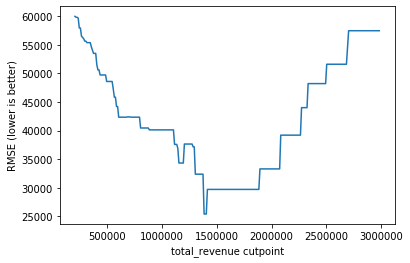

In [35]:
# Plot mileage cutpoint (x-axis) versus RMSE (y-axis).
plt.plot(revenue_range, RMSE);
plt.xlabel('total_revenue cutpoint');
plt.ylabel('RMSE (lower is better)');

In [49]:
## build regression tree in scikit_learn
# Encode mathematics test as 0 and reading as 1.
edu['test_subject'] = edu.test_subject.map({'Mathematics':0, 'Reading':1})

In [50]:
# Define X and y.
feature_cols = ['year', 'total_revenue', 'test_subject']

X = edu[feature_cols]
y = edu.enrollment

In [51]:
y.isnull().sum()

0

In [52]:
X.isnull().sum()

year             0
total_revenue    0
test_subject     0
dtype: int64

In [53]:
# Initiate decisin tree regression (with random state = 1)

from sklearn.tree import DecisionTreeRegressor

treereg = DecisionTreeRegressor(random_state=1)
treereg

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [54]:
## use loove to estimate RMSE
from sklearn.model_selection import cross_val_score
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

15239.025349074727

tuning regressibon tree
try different values one by one
max depth 

In [68]:
## list of value to try
## list of store avg RMSE of each max depth
## use loove again
max_depth_range = list(range(1, 20))
RMSE_scores = []

for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

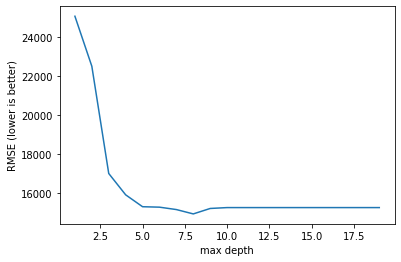

In [69]:
plt.plot(max_depth_range, RMSE_scores);
plt.xlabel('max depth');
plt.ylabel('RMSE (lower is better)');

In [70]:
# max_depth=7 was best, so fit a tree using that parameter.
treereg = DecisionTreeRegressor(max_depth=7, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [71]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature.
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,year,0.074362
1,total_revenue,0.925636
2,test_subject,0.000002


In [ ]:
## create tree diagram

In [105]:
!pip install graphviz

In [119]:
# Create a Graphviz file.
from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file='./data/tree_edu.dot', feature_names=feature_cols)

In [120]:
!pip install pydotplus

In [122]:
import pydotplus 
tree_edu = tree.export_graphviz(treereg, out_file=None) 
graph = pydotplus.graph_from_dot_data(tree_edu) 
graph.write_pdf("./data/tree_edu.pdf") 

True

dot -Tpdf tree_edu.dot -o tree.pdf ##unsure why  it doesn't work